In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
files_simu = [
    './simulation/2011_MagDown.root', 
    './simulation/2015_MagDown.root',
    './simulation/2015_MagUp.root',
    './simulation/2016_MagDown.root',
    './simulation/2016_MagUp.root',
    './simulation/2017_MagDown.root',
    './simulation/2017_MagUp.root',
    './simulation/2018_MagDown.root',
    './simulation/2018_MagUp.root'
]

files_real_data = [
    './real_data/2011_MagDown_data.root', 
    './real_data/2011_MagUp_data.root'
]
simu_data = uproot.concatenate(files_simu, cut = 'Bc_BKGCAT==0', library='pd')
real_data = uproot.concatenate(files_real_data, library='pd')
real_data['delta_mass'] = real_data['Dst_M'] - real_data['D0_M']
simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']

/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_1774/169099.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  real_data['delta_mass'] = real_data['Dst_M'] - real_data['D0_M']
/var/folders/mh/zhwzz3rj1_7dnp568ry0gfpm0000gs/T/ipykernel_1774/169099.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simu_data['delta_mass'] = simu_data['Dst_M'] - simu_data['D0_M']


In [34]:
#SELECTIONS DEFINITIONS

Notion_model_selection_D0 = '(D0_ENDVERTEX_CHI2 < 9.) & (delta_mass>139) & (delta_mass<151) & (D0_M>1830) & (D0_M<1890) & (K_IPCHI2_OWNPV>3.) & (pi_IPCHI2_OWNPV>3.) & (K_TRACK_CHI2NDOF<1.7) & (pi_TRACK_CHI2NDOF<1.7) & (K_PT>250) & (pi_PT>250) & (K_hasRich==1) & (pi_hasRich==1) & (K_ProbNNghost<0.3) & (pi_ProbNNghost<0.3) & (K_ProbNNk>0.1) & (pi_ProbNNpi>0.1)'
Notion_model_selection_Jpsi_original = (
    '(delta_mass>139) & (delta_mass<151) &'
    '(mp_TRACK_CHI2NDOF < 3.) & '
    '(mm_TRACK_CHI2NDOF < 3.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 550) & (mm_PT > 550) & '
    '(mp_IPCHI2_OWNPV > 4.) & (mm_IPCHI2_OWNPV > 4.) &'

    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) &'
    '(Jpsi_ENDVERTEX_CHI2 < 9.)'

)
Notion_model_selection_Jpsi = (
    '(delta_mass>139) & (delta_mass<151) &'
    '(mp_TRACK_CHI2NDOF < 2.) & '
    '(mm_TRACK_CHI2NDOF < 2.) & '
    '(mp_isMuon == 1) & (mm_isMuon == 1) & '
    '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
    '(mp_PT > 700) & (mm_PT > 700) & '
    '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) &'

    '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) &'
    '(Jpsi_ENDVERTEX_CHI2 < 5.)'

)

Notion_model_selection_Jpsi_without_TRACK_CHI2NDOF = (
            '(delta_mass>139) & (delta_mass<151) &'
            '(mp_isMuon == 1) & (mm_isMuon == 1) & '
            '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
            '(mp_PT > 700) & (mm_PT > 700) & '
            '(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.) &'

            '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) &'
            '(Jpsi_ENDVERTEX_CHI2 < 5.)'

        )
Notion_model_selection_Jpsi_without_PT = (
            '(delta_mass>139) & (delta_mass<151) &'
            '(mp_TRACK_CHI2NDOF < 2.) & '
            '(mm_TRACK_CHI2NDOF < 2.) & '
            '(mp_isMuon == 1) & (mm_isMuon == 1) & '
            '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
            '(mp_IPCHI2_OWNPV > 7.) & (mm_IPCHI2_OWNPV > 7.) &'

            '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) &'
            '(Jpsi_ENDVERTEX_CHI2 < 5.)'

        )
Notion_model_selection_Jpsi_without_IPCHI2_OWNPV = (
            '(delta_mass>139) & (delta_mass<151) &'
            '(mp_TRACK_CHI2NDOF < 2.) & '
            '(mm_TRACK_CHI2NDOF < 2.) & '
            '(mp_isMuon == 1) & (mm_isMuon == 1) & '
            '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
            '(mp_PT > 700) & (mm_PT > 700) & '

            '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) &'
            '(Jpsi_ENDVERTEX_CHI2 < 5.)'

        )
Notion_model_selection_Jpsi_without_ENDVERTEX_CHI2 = (
            '(delta_mass>139) & (delta_mass<151) &'
            '(mp_TRACK_CHI2NDOF < 2.) & '
            '(mm_TRACK_CHI2NDOF < 2.) & '
            '(mp_isMuon == 1) & (mm_isMuon == 1) & '
            '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
            '(mp_PT > 700) & (mm_PT > 700) & '
            '(mp_IPCHI2_OWNPV > 7.) & (mm_IPCHI2_OWNPV > 7.) &'

            '(Jpsi_M < 3140.) & (Jpsi_M > 3040.)'

        )

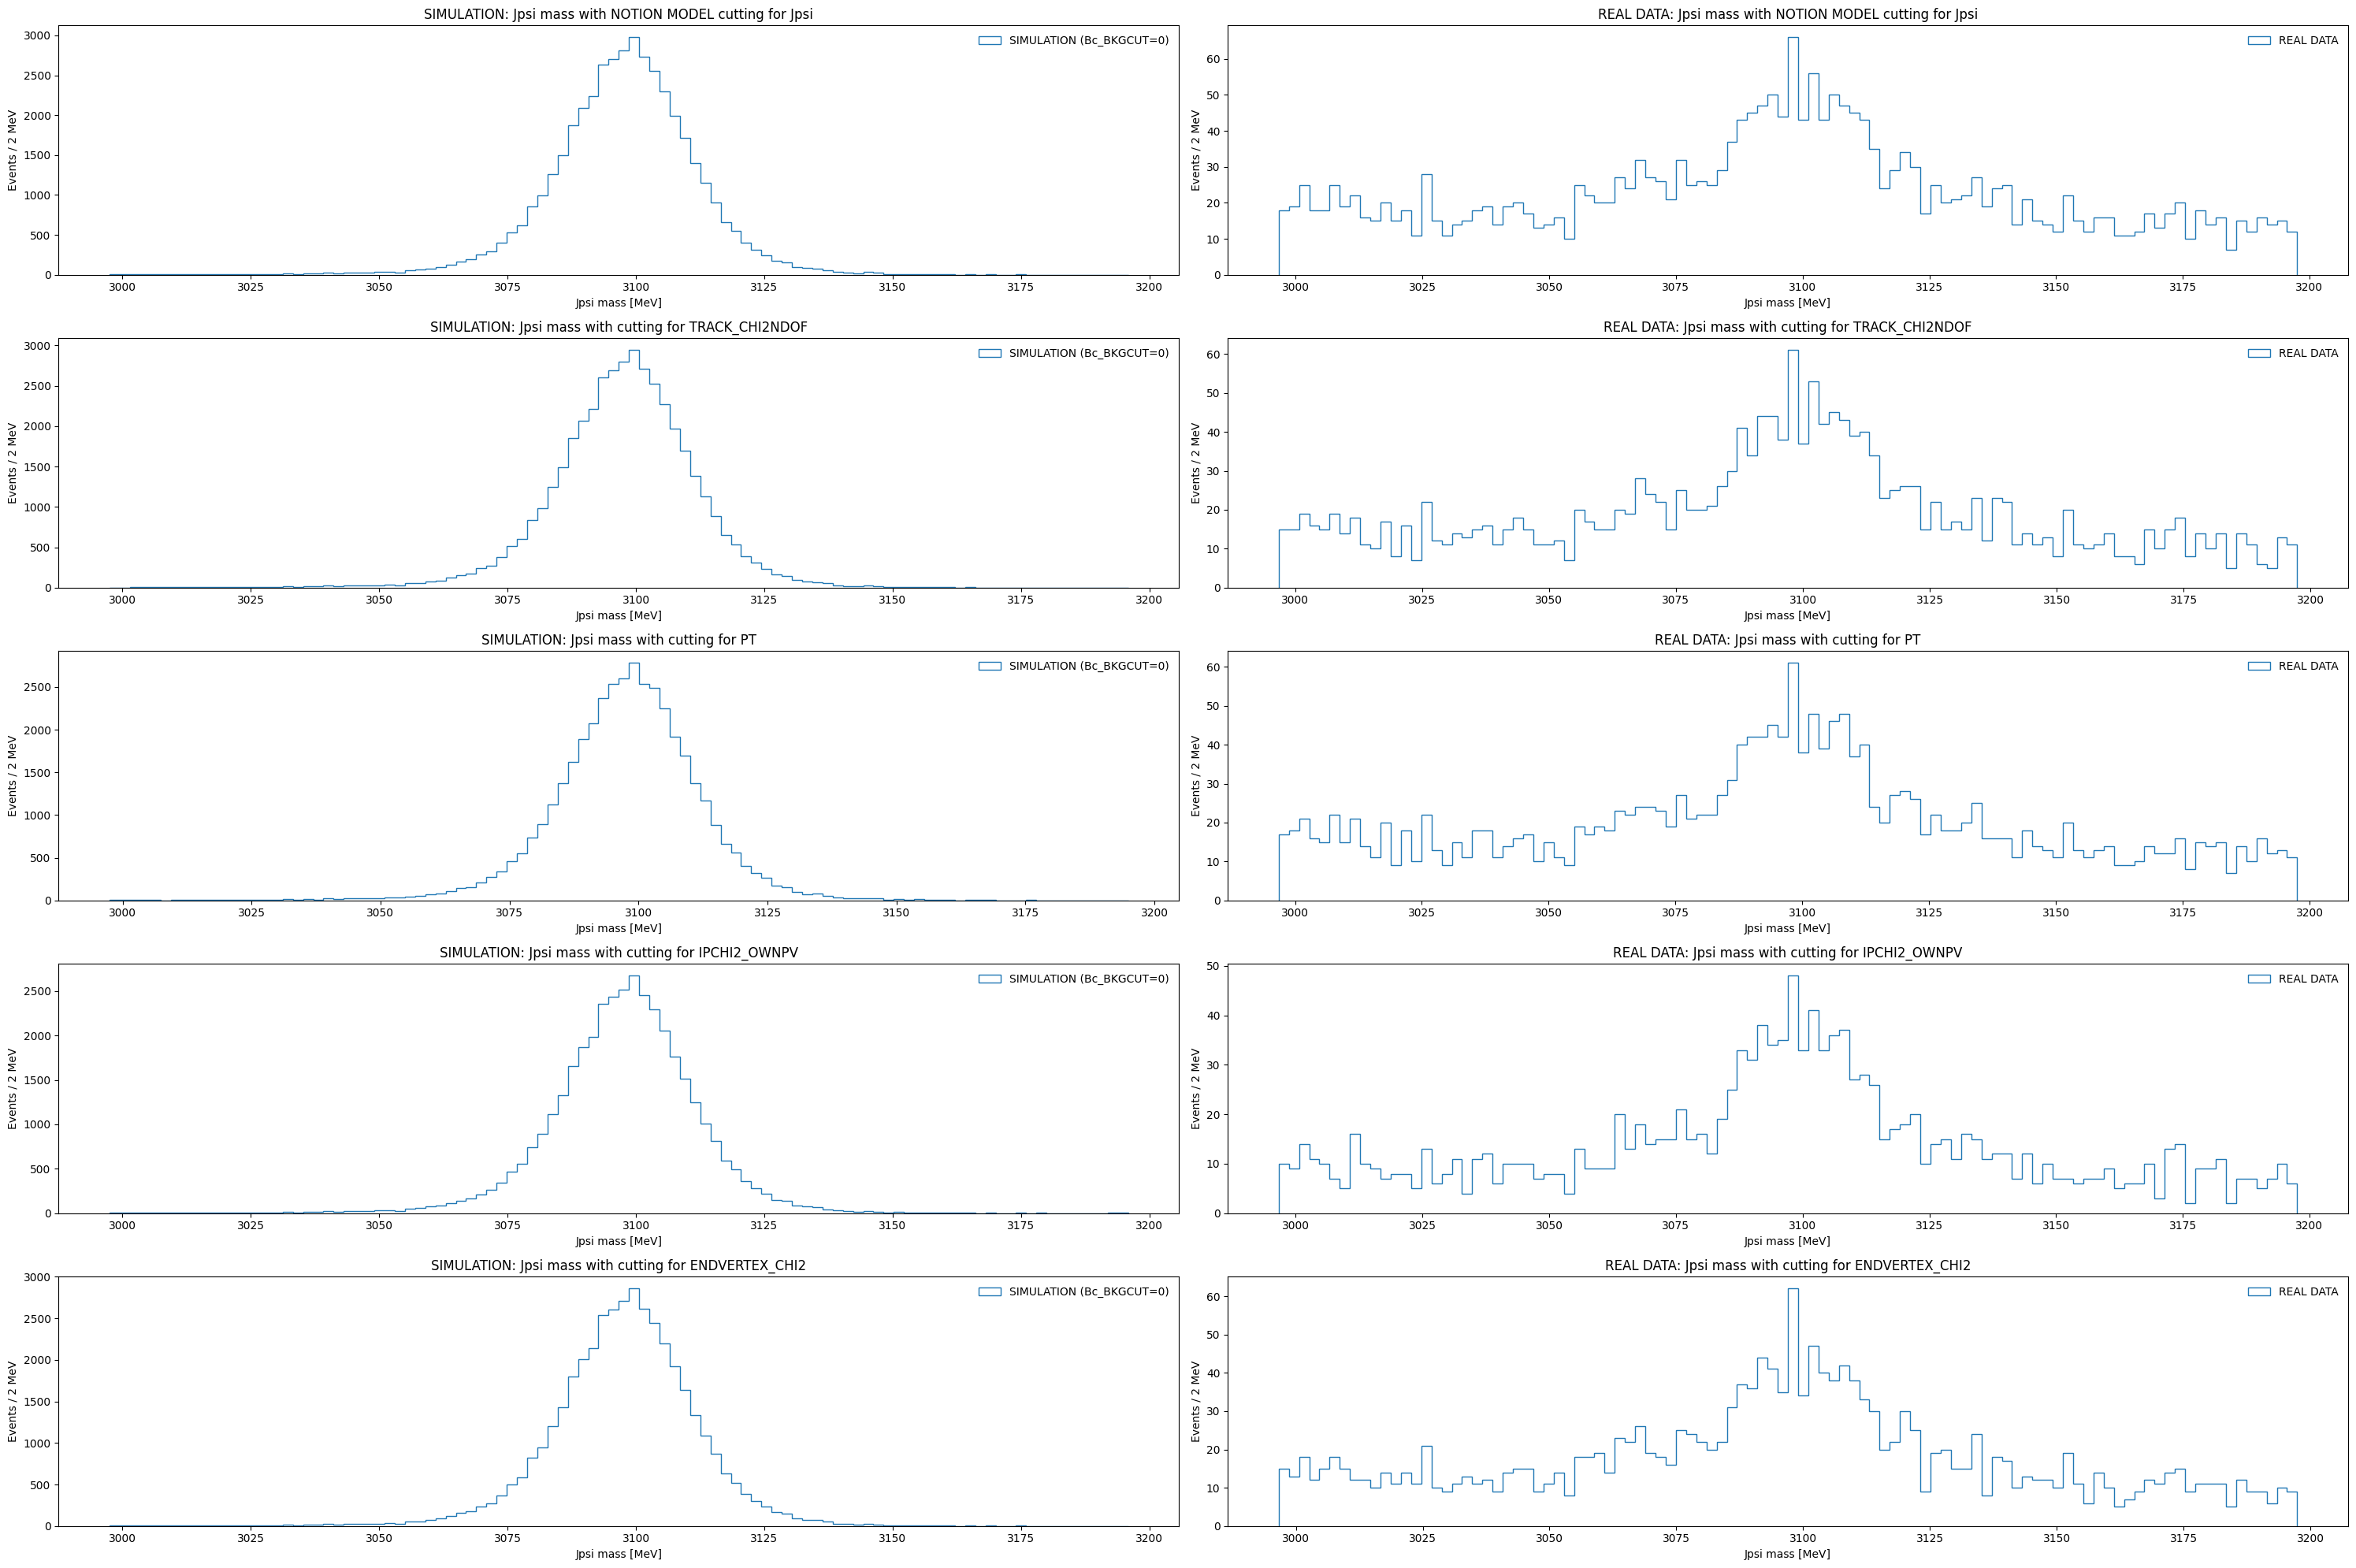

In [39]:
#FINDING HYPERCUT

fig, axes = plt.subplots(5, 2, figsize=(30, 20))
#for raw:
axes[0,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[0,0].set_xlabel('Jpsi mass [MeV]')
axes[0,0].set_ylabel('Events / 2 MeV')
axes[0,0].set_title('SIMULATION: Jpsi mass with NOTION MODEL cutting for Jpsi')
axes[0,0].legend(frameon=False)

axes[0,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[0,1].set_xlabel('Jpsi mass [MeV]')
axes[0,1].set_ylabel('Events / 2 MeV')
axes[0,1].set_title('REAL DATA: Jpsi mass with NOTION MODEL cutting for Jpsi')
axes[0,1].legend(frameon=False)
#for TRACK_CHI2NDOF :
axes[1,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) & (mp_TRACK_CHI2NDOF < 2.) & (mm_TRACK_CHI2NDOF < 2.)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[1,0].set_xlabel('Jpsi mass [MeV]')
axes[1,0].set_ylabel('Events / 2 MeV')
axes[1,0].set_title('SIMULATION: Jpsi mass with cutting for TRACK_CHI2NDOF')
axes[1,0].legend(frameon=False)

axes[1,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151) & (mp_TRACK_CHI2NDOF < 2.) & (mm_TRACK_CHI2NDOF < 2.)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[1,1].set_xlabel('Jpsi mass [MeV]')
axes[1,1].set_ylabel('Events / 2 MeV')
axes[1,1].set_title('REAL DATA: Jpsi mass with cutting for TRACK_CHI2NDOF')
axes[1,1].legend(frameon=False)
#for PT :
axes[2,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) &(mp_PT > 700) & (mm_PT > 700)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[2,0].set_xlabel('Jpsi mass [MeV]')
axes[2,0].set_ylabel('Events / 2 MeV')
axes[2,0].set_title('SIMULATION: Jpsi mass with cutting for PT')
axes[2,0].legend(frameon=False)

axes[2,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151) &(mp_PT > 700) & (mm_PT > 700)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[2,1].set_xlabel('Jpsi mass [MeV]')
axes[2,1].set_ylabel('Events / 2 MeV')
axes[2,1].set_title('REAL DATA: Jpsi mass with cutting for PT')
axes[2,1].legend(frameon=False)

#for IPCHI2_OWNPV :
axes[3,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) &(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[3,0].set_xlabel('Jpsi mass [MeV]')
axes[3,0].set_ylabel('Events / 2 MeV')
axes[3,0].set_title('SIMULATION: Jpsi mass with cutting for IPCHI2_OWNPV')
axes[3,0].legend(frameon=False)

axes[3,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151) &(mp_IPCHI2_OWNPV > 2.) & (mm_IPCHI2_OWNPV > 2.)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[3,1].set_xlabel('Jpsi mass [MeV]')
axes[3,1].set_ylabel('Events / 2 MeV')
axes[3,1].set_title('REAL DATA: Jpsi mass with cutting for IPCHI2_OWNPV')
axes[3,1].legend(frameon=False)
#for ENDVERTEX_CHI2 :
axes[4,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) &(Jpsi_ENDVERTEX_CHI2 < 5.)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[4,0].set_xlabel('Jpsi mass [MeV]')
axes[4,0].set_ylabel('Events / 2 MeV')
axes[4,0].set_title('SIMULATION: Jpsi mass with cutting for ENDVERTEX_CHI2')
axes[4,0].legend(frameon=False)

axes[4,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151) &(Jpsi_ENDVERTEX_CHI2 < 5.)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[4,1].set_xlabel('Jpsi mass [MeV]')
axes[4,1].set_ylabel('Events / 2 MeV')
axes[4,1].set_title('REAL DATA: Jpsi mass with cutting for ENDVERTEX_CHI2')
axes[4,1].legend(frameon=False)

plt.tight_layout()
plt.show()

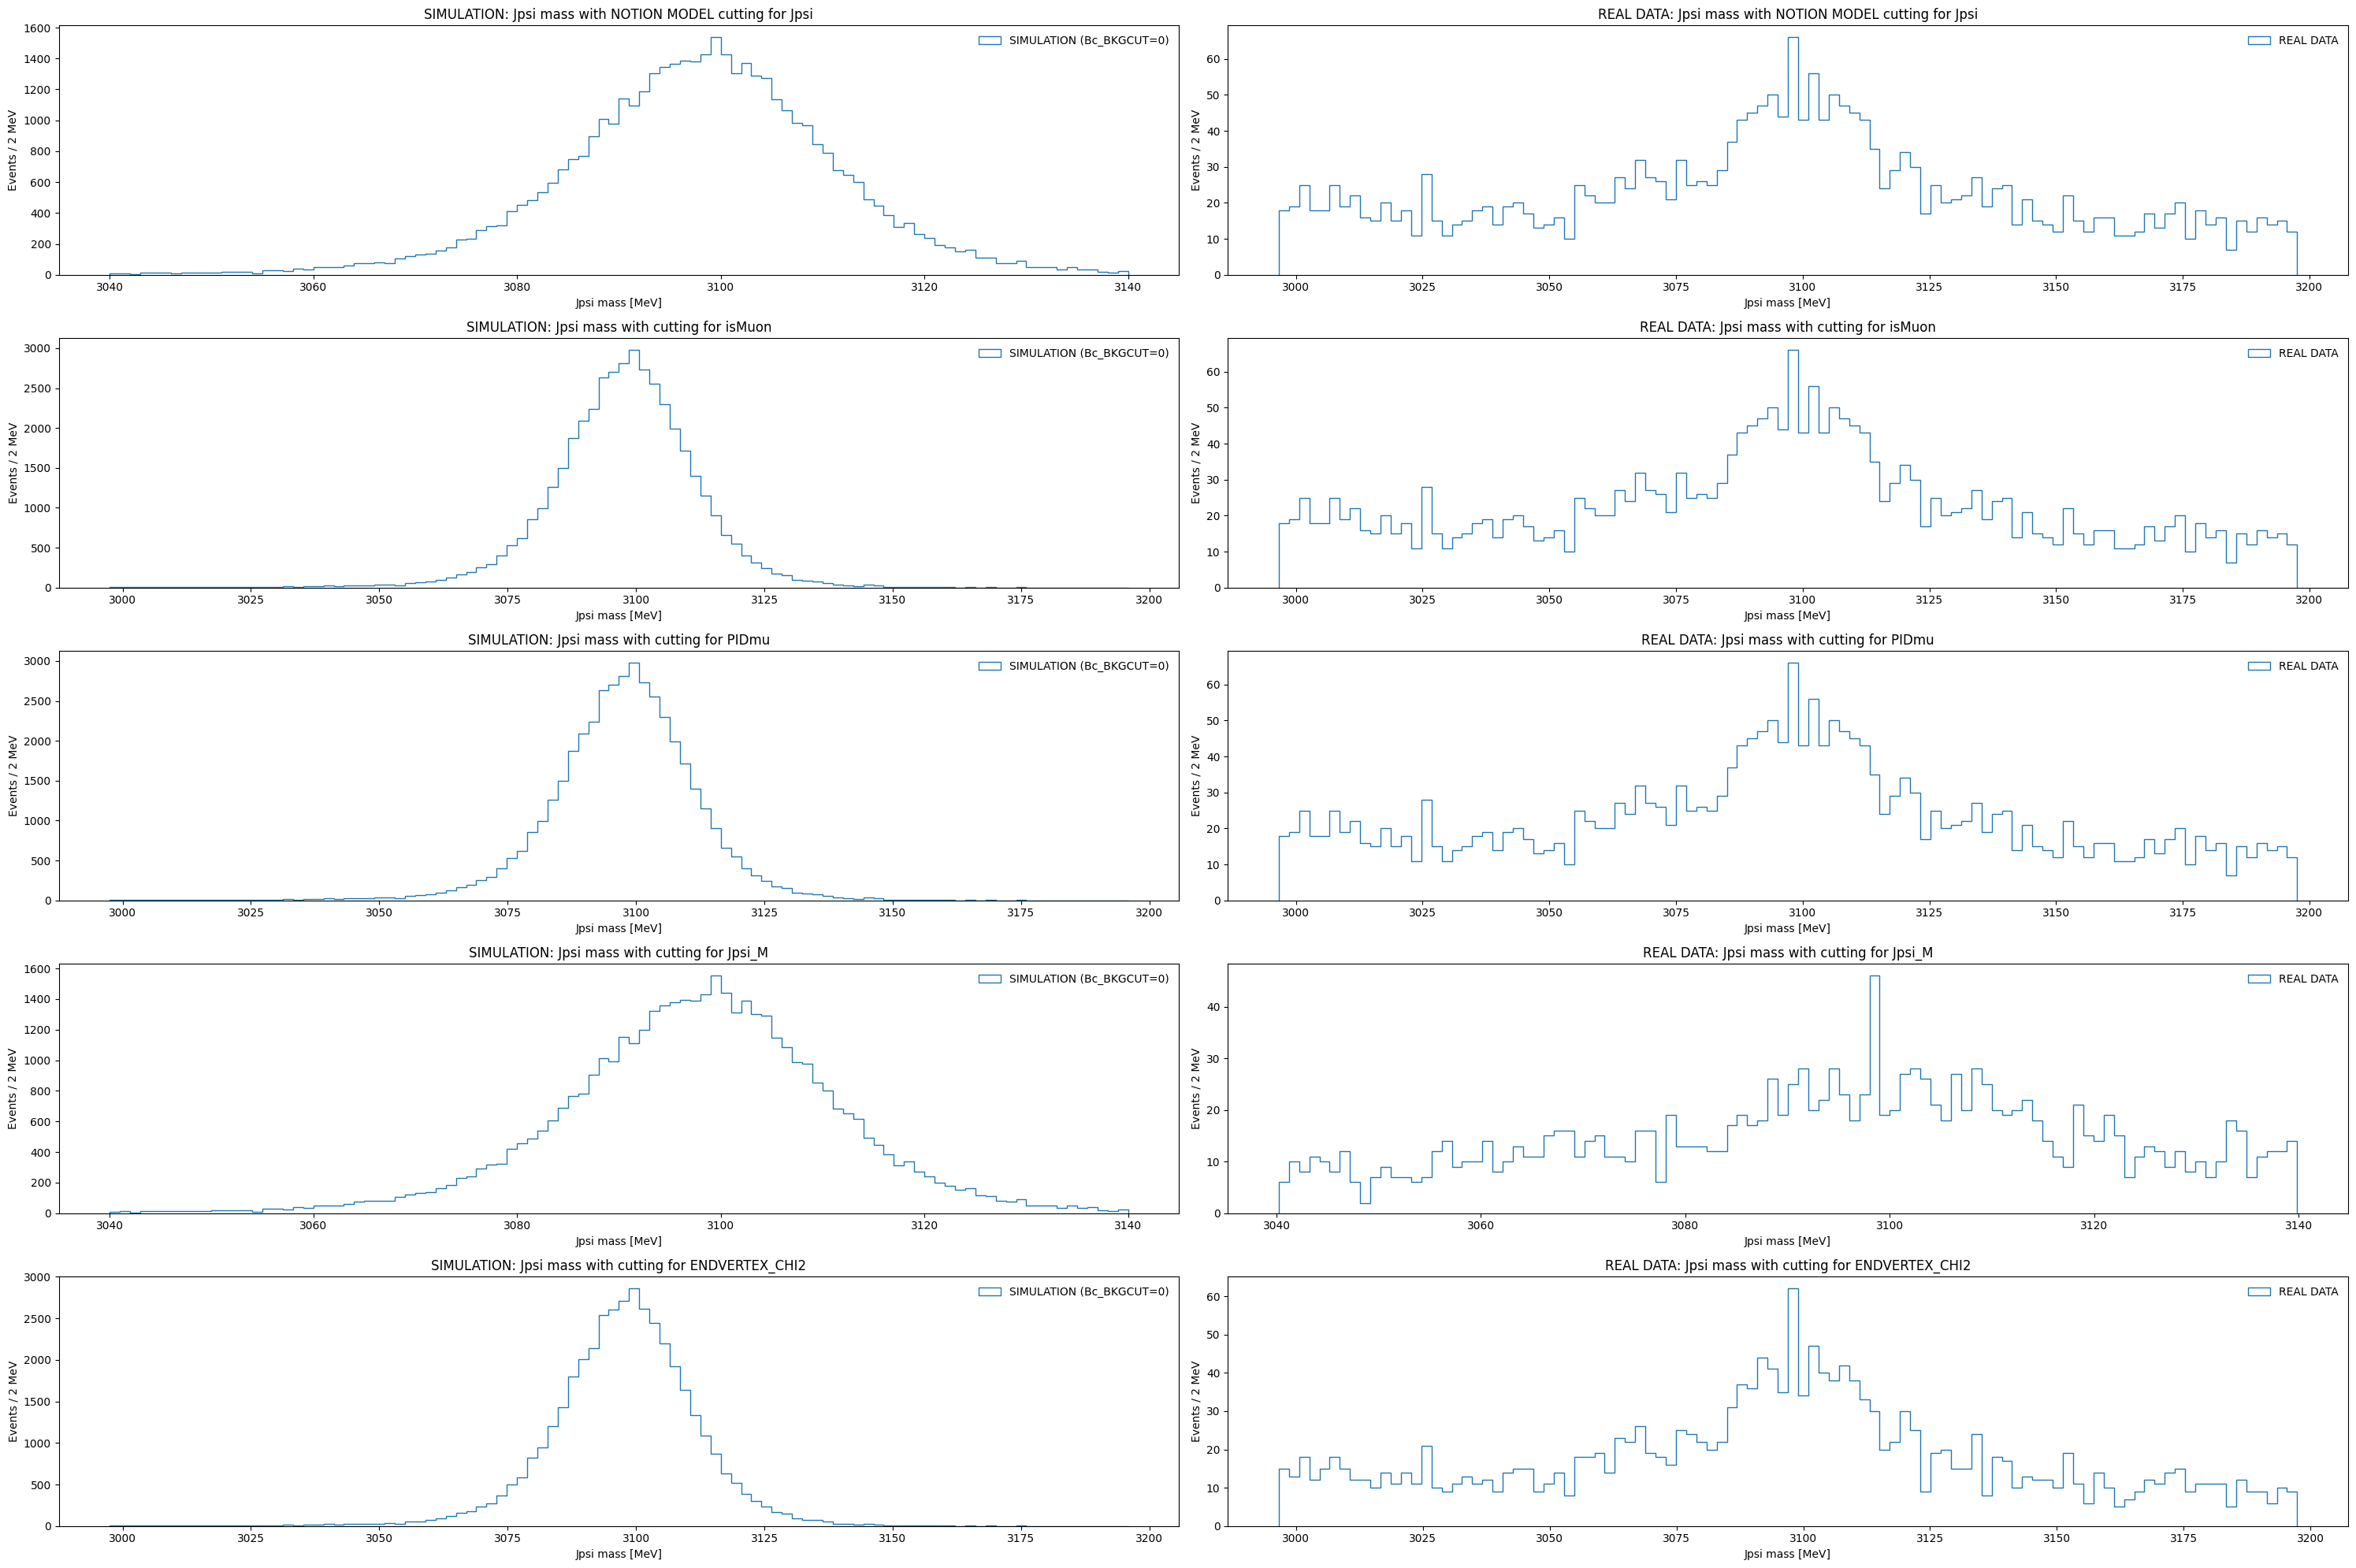

In [44]:
#FINDING HYPERCUT

fig, axes = plt.subplots(5, 2, figsize=(30, 20))
#for raw:
axes[0,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) &'
                               '(mp_isMuon == 1) & (mm_isMuon == 1) & '
                                '(mp_PIDmu > 0) & (mm_PIDmu > 0) & '
                                '(Jpsi_M < 3140.) & (Jpsi_M > 3040.) &'
                                '(Jpsi_ENDVERTEX_CHI2 < 9.)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[0,0].set_xlabel('Jpsi mass [MeV]')
axes[0,0].set_ylabel('Events / 2 MeV')
axes[0,0].set_title('SIMULATION: Jpsi mass with NOTION MODEL cutting for Jpsi')
axes[0,0].legend(frameon=False)

axes[0,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[0,1].set_xlabel('Jpsi mass [MeV]')
axes[0,1].set_ylabel('Events / 2 MeV')
axes[0,1].set_title('REAL DATA: Jpsi mass with NOTION MODEL cutting for Jpsi')
axes[0,1].legend(frameon=False)
#for isMuon :
axes[1,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) & (mp_isMuon == 1) & (mm_isMuon == 1)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[1,0].set_xlabel('Jpsi mass [MeV]')
axes[1,0].set_ylabel('Events / 2 MeV')
axes[1,0].set_title('SIMULATION: Jpsi mass with cutting for isMuon')
axes[1,0].legend(frameon=False)

axes[1,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151) & (mp_isMuon == 1) & (mm_isMuon == 1)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[1,1].set_xlabel('Jpsi mass [MeV]')
axes[1,1].set_ylabel('Events / 2 MeV')
axes[1,1].set_title('REAL DATA: Jpsi mass with cutting for isMuon')
axes[1,1].legend(frameon=False)
#for PIDmu :
axes[2,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) &(mp_PIDmu > 0) & (mm_PIDmu > 0)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[2,0].set_xlabel('Jpsi mass [MeV]')
axes[2,0].set_ylabel('Events / 2 MeV')
axes[2,0].set_title('SIMULATION: Jpsi mass with cutting for PIDmu')
axes[2,0].legend(frameon=False)

axes[2,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151) &(mp_PIDmu > 0) & (mm_PIDmu > 0)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[2,1].set_xlabel('Jpsi mass [MeV]')
axes[2,1].set_ylabel('Events / 2 MeV')
axes[2,1].set_title('REAL DATA: Jpsi mass with cutting for PIDmu')
axes[2,1].legend(frameon=False)

#for Jpsi_M :
axes[3,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) &(Jpsi_M < 3140.) & (Jpsi_M > 3040.)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[3,0].set_xlabel('Jpsi mass [MeV]')
axes[3,0].set_ylabel('Events / 2 MeV')
axes[3,0].set_title('SIMULATION: Jpsi mass with cutting for Jpsi_M')
axes[3,0].legend(frameon=False)

axes[3,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151) &(Jpsi_M < 3140.) & (Jpsi_M > 3040.)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[3,1].set_xlabel('Jpsi mass [MeV]')
axes[3,1].set_ylabel('Events / 2 MeV')
axes[3,1].set_title('REAL DATA: Jpsi mass with cutting for Jpsi_M')
axes[3,1].legend(frameon=False)
#for ENDVERTEX_CHI2 :
axes[4,0].hist(simu_data.query('(delta_mass>139) & (delta_mass<151) &(Jpsi_ENDVERTEX_CHI2 < 5.)')['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[4,0].set_xlabel('Jpsi mass [MeV]')
axes[4,0].set_ylabel('Events / 2 MeV')
axes[4,0].set_title('SIMULATION: Jpsi mass with cutting for ENDVERTEX_CHI2')
axes[4,0].legend(frameon=False)

axes[4,1].hist(real_data.query('(delta_mass>139) & (delta_mass<151) &(Jpsi_ENDVERTEX_CHI2 < 5.)')['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[4,1].set_xlabel('Jpsi mass [MeV]')
axes[4,1].set_ylabel('Events / 2 MeV')
axes[4,1].set_title('REAL DATA: Jpsi mass with cutting for ENDVERTEX_CHI2')
axes[4,1].legend(frameon=False)

plt.tight_layout()
plt.show()

Mean of SIMULATION (Bc_BKGCUT=0): 3097.67 MeV
Mean of REAL DATA: 3096.88 MeV
Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: 3097.76 MeV
Mean of REAL DATA with NOTION MODEL cutting: 3095.57 MeV


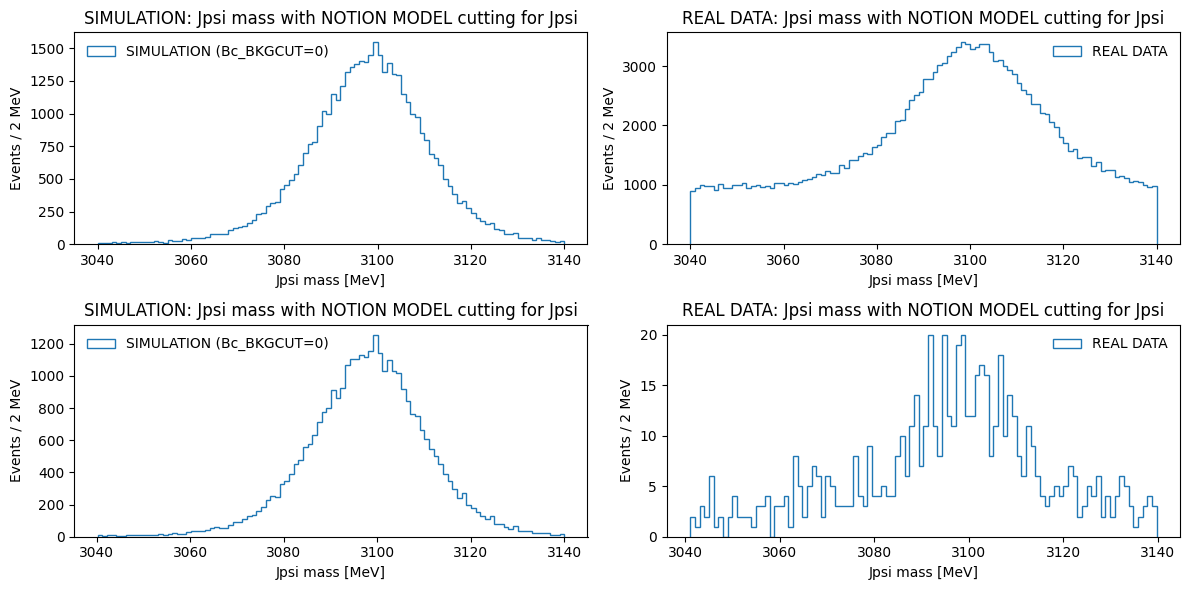

In [45]:
#Jpsi mass: Comparing Notion cuts for Jpsi and Jpsi

simu_data_true = simu_data['Jpsi_M']
real_data_true = real_data['Jpsi_M']
simu_data_cut = simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M']
real_data_cut = real_data.query(Notion_model_selection_Jpsi)['Jpsi_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)


print(f'Mean of SIMULATION (Bc_BKGCUT=0): {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION (Bc_BKGCUT=0) with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')



fig, axes = plt.subplots(2, 2, figsize=(12, 6))
#for Jpsi:
axes[0,0].hist(simu_data['Jpsi_M'], range=(3040, 3140), bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[0,0].set_xlabel('Jpsi mass [MeV]')
axes[0,0].set_ylabel('Events / 2 MeV')
axes[0,0].set_title('SIMULATION: Jpsi mass with NOTION MODEL cutting for Jpsi')
axes[0,0].legend(frameon=False)

axes[0,1].hist(real_data['Jpsi_M'],range=(3040, 3140), bins=100, histtype='step', label='REAL DATA')
axes[0,1].set_xlabel('Jpsi mass [MeV]')
axes[0,1].set_ylabel('Events / 2 MeV')
axes[0,1].set_title('REAL DATA: Jpsi mass with NOTION MODEL cutting for Jpsi')
axes[0,1].legend(frameon=False)
#for Jpsi:
axes[1,0].hist(simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M'], bins=100, histtype='step', label='SIMULATION (Bc_BKGCUT=0)')
axes[1,0].set_xlabel('Jpsi mass [MeV]')
axes[1,0].set_ylabel('Events / 2 MeV')
axes[1,0].set_title('SIMULATION: Jpsi mass with NOTION MODEL cutting for Jpsi')
axes[1,0].legend(frameon=False)

axes[1,1].hist(real_data.query(Notion_model_selection_Jpsi)['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
axes[1,1].set_xlabel('Jpsi mass [MeV]')
axes[1,1].set_ylabel('Events / 2 MeV')
axes[1,1].set_title('REAL DATA: Jpsi mass with NOTION MODEL cutting for Jpsi')
axes[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

Mean of SIMULATION: 3097.67 MeV
Mean of REAL DATA: 3096.88 MeV
Mean of SIMULATION with NOTION MODEL cutting: 3097.75 MeV
Mean of REAL DATA with NOTION MODEL cutting: 3096.37 MeV


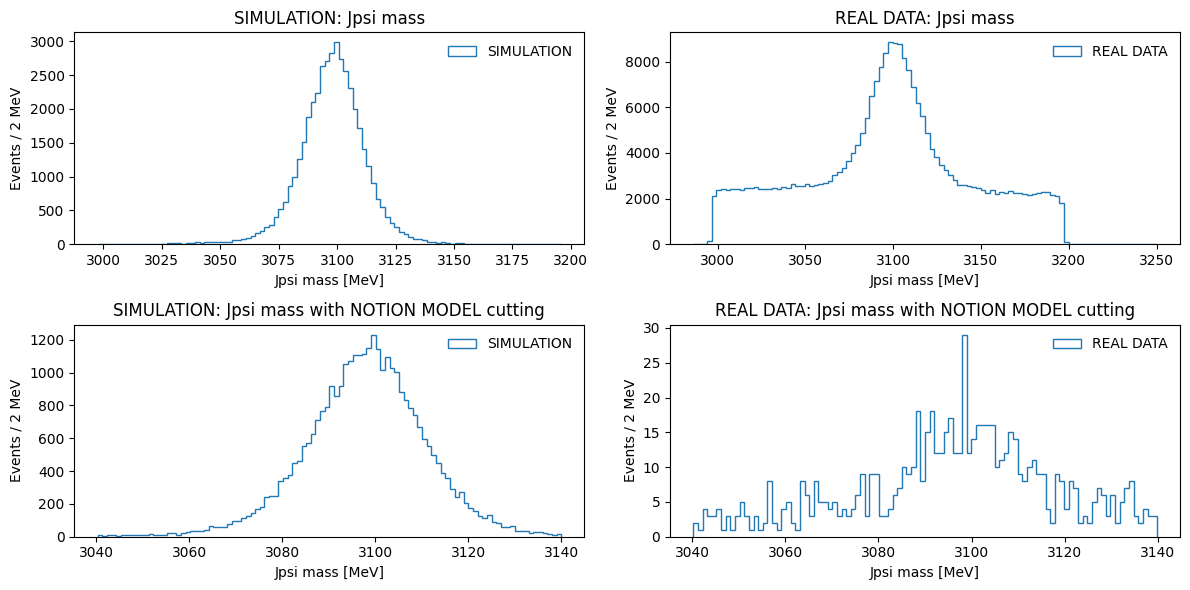

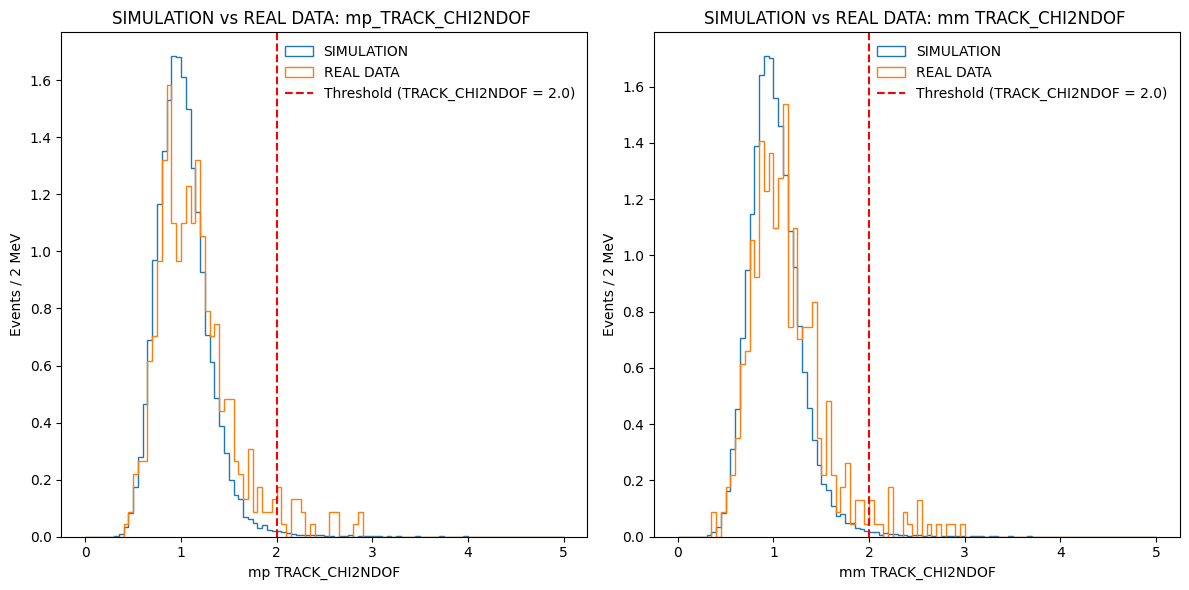

In [26]:
#TRACK_CHI2NDOF checking ((mp_TRACK_CHI2NDOF<2.0) & (mm_TRACK_CHI2NDOF<2.0))


simu_data_true = simu_data['Jpsi_M']
real_data_true = real_data['Jpsi_M']
simu_data_cut = simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M']
real_data_cut = real_data.query(Notion_model_selection_Jpsi)['Jpsi_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Jpsi_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Jpsi mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Jpsi mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Jpsi mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Jpsi mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Jpsi_original)['Jpsi_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Jpsi mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Jpsi mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Jpsi_original)['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Jpsi mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Jpsi mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(simu_data.query(Notion_model_selection_Jpsi_without_TRACK_CHI2NDOF)['mp_TRACK_CHI2NDOF'],density = True, bins=100, histtype='step', range=(0,5), label='SIMULATION')
axes[0].hist(real_data.query(Notion_model_selection_Jpsi_without_TRACK_CHI2NDOF)['mp_TRACK_CHI2NDOF'],density = True, bins=100, histtype='step', range=(0,5), label='REAL DATA')
axes[0].axvline(x=2.0, color='red', linestyle='--', label='Threshold (TRACK_CHI2NDOF = 2.0)')
axes[0].set_xlabel('mp TRACK_CHI2NDOF')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION vs REAL DATA: mp_TRACK_CHI2NDOF ')
axes[0].legend(frameon=False)

axes[1].hist(simu_data.query(Notion_model_selection_Jpsi_without_TRACK_CHI2NDOF)['mm_TRACK_CHI2NDOF'], density = True, bins=100, histtype='step', range=(0,5), label='SIMULATION')
axes[1].hist(real_data.query(Notion_model_selection_Jpsi_without_TRACK_CHI2NDOF)['mm_TRACK_CHI2NDOF'], density = True, bins=100, histtype='step', range=(0,5), label='REAL DATA')
axes[1].axvline(x=2.0, color='red', linestyle='--', label='Threshold (TRACK_CHI2NDOF = 2.0)')
axes[1].set_xlabel('mm TRACK_CHI2NDOF')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('SIMULATION vs REAL DATA: mm TRACK_CHI2NDOF ')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

Mean of SIMULATION: 3097.67 MeV
Mean of REAL DATA: 3096.88 MeV
Mean of SIMULATION with NOTION MODEL cutting: 3097.61 MeV
Mean of REAL DATA with NOTION MODEL cutting: 3095.88 MeV


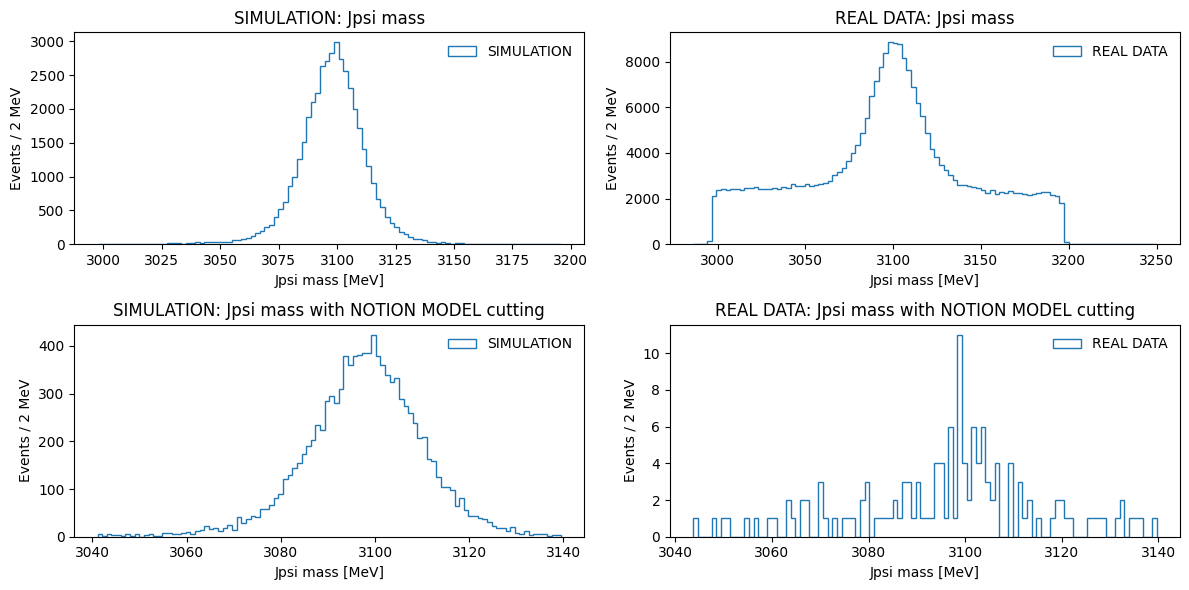

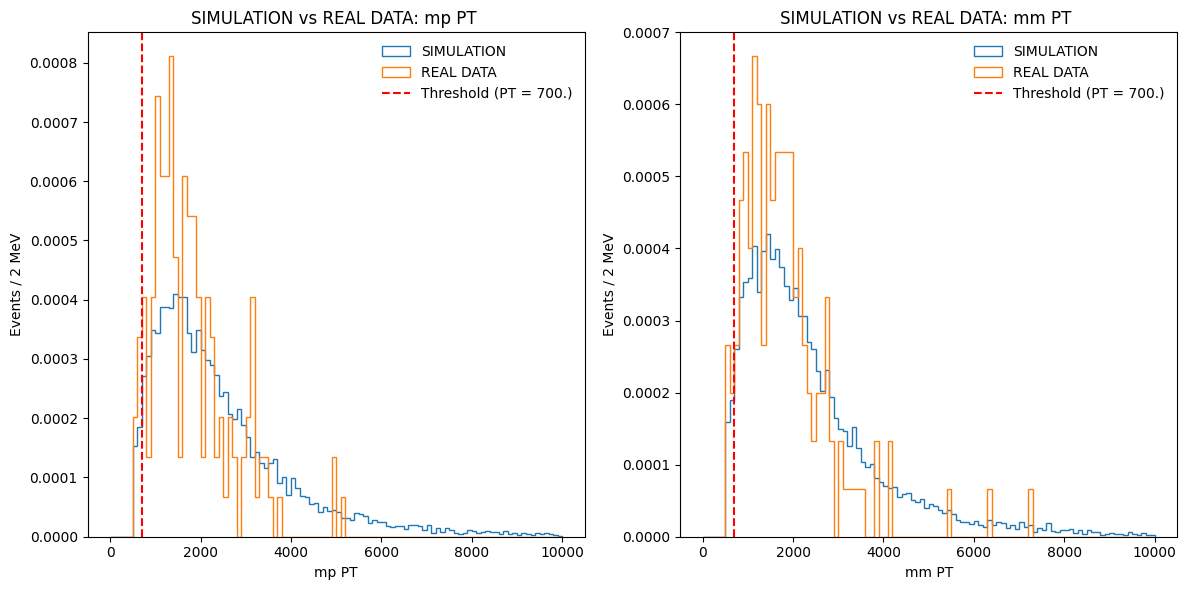

In [20]:
#PT checking ((mp_PT>700.) & (mm_PT>700.))


simu_data_true = simu_data['Jpsi_M']
real_data_true = real_data['Jpsi_M']
simu_data_cut = simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M']
real_data_cut = real_data.query(Notion_model_selection_Jpsi)['Jpsi_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Jpsi_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Jpsi mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Jpsi mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Jpsi mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Jpsi mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Jpsi mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Jpsi mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Jpsi)['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Jpsi mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Jpsi mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(simu_data.query(Notion_model_selection_Jpsi_without_PT)['mp_PT'],density = True, bins=100, histtype='step', range=(0,10000), label='SIMULATION')
axes[0].hist(real_data.query(Notion_model_selection_Jpsi_without_PT)['mp_PT'],density = True, bins=100, histtype='step', range=(0,10000), label='REAL DATA')
axes[0].axvline(x=700., color='red', linestyle='--', label='Threshold (PT = 700.)')
axes[0].set_xlabel('mp PT')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION vs REAL DATA: mp PT ')
axes[0].legend(frameon=False)

axes[1].hist(simu_data.query(Notion_model_selection_Jpsi_without_PT)['mm_PT'], density = True, bins=100, histtype='step', range=(0,10000), label='SIMULATION')
axes[1].hist(real_data.query(Notion_model_selection_Jpsi_without_PT)['mm_PT'], density = True, bins=100, histtype='step', range=(0,10000), label='REAL DATA')
axes[1].axvline(x=700., color='red', linestyle='--', label='Threshold (PT = 700.)')
axes[1].set_xlabel('mm PT')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('SIMULATION vs REAL DATA: mm PT ')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

Mean of SIMULATION: 3097.67 MeV
Mean of REAL DATA: 3096.88 MeV
Mean of SIMULATION with NOTION MODEL cutting: 3097.75 MeV
Mean of REAL DATA with NOTION MODEL cutting: 3096.37 MeV


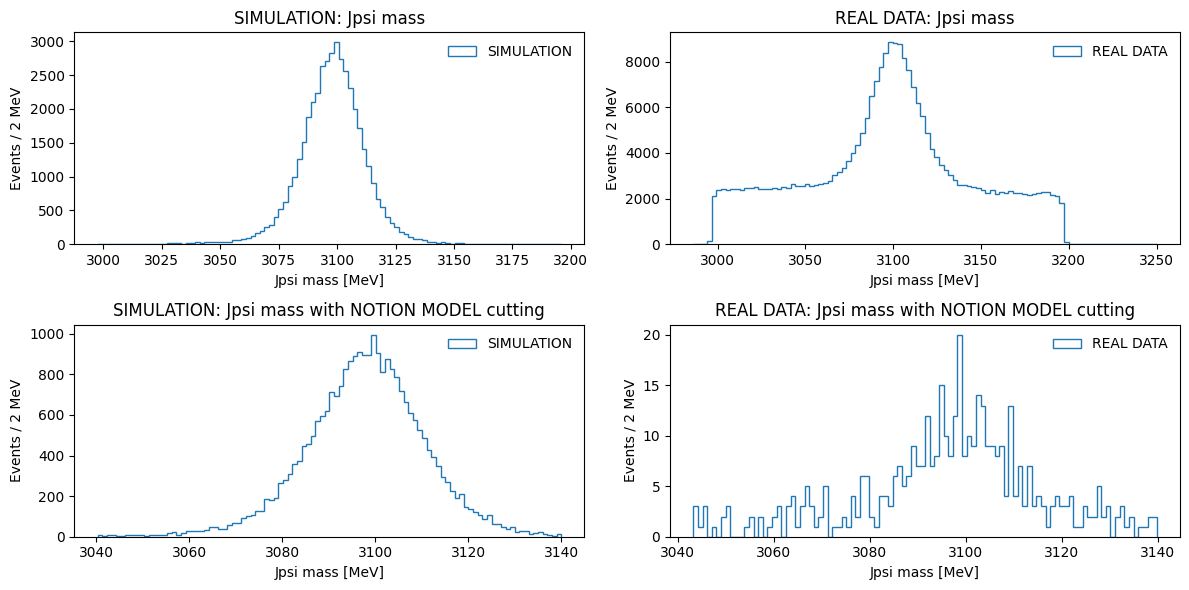

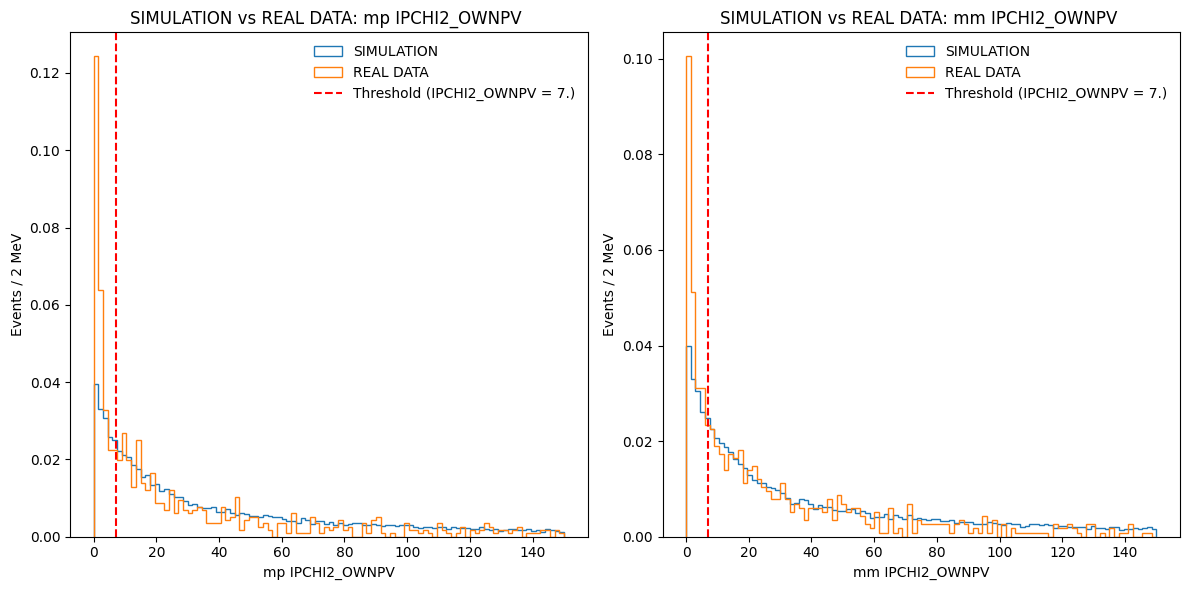

In [28]:
#IPCHI2_OWNPV checking ((mp_IPCHI2_OWNPV>7.) & (mm_IPCHI2_OWNPV>7.))


simu_data_true = simu_data['Jpsi_M']
real_data_true = real_data['Jpsi_M']
simu_data_cut = simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M']
real_data_cut = real_data.query(Notion_model_selection_Jpsi)['Jpsi_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Jpsi_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Jpsi mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Jpsi mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Jpsi mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Jpsi mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Jpsi mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Jpsi mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Jpsi)['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Jpsi mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Jpsi mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(simu_data.query(Notion_model_selection_Jpsi_without_IPCHI2_OWNPV)['mp_IPCHI2_OWNPV'],density = True, bins=100, histtype='step', range=(0,150), label='SIMULATION')
axes[0].hist(real_data.query(Notion_model_selection_Jpsi_without_IPCHI2_OWNPV)['mp_IPCHI2_OWNPV'],density = True, bins=100, histtype='step', range=(0,150), label='REAL DATA')
axes[0].axvline(x=7., color='red', linestyle='--', label='Threshold (IPCHI2_OWNPV = 7.)')
axes[0].set_xlabel('mp IPCHI2_OWNPV')
axes[0].set_ylabel('Events / 2 MeV')
axes[0].set_title('SIMULATION vs REAL DATA: mp IPCHI2_OWNPV ')
axes[0].legend(frameon=False)

axes[1].hist(simu_data.query(Notion_model_selection_Jpsi_without_IPCHI2_OWNPV)['mm_IPCHI2_OWNPV'], density = True, bins=100, histtype='step', range=(0,150), label='SIMULATION')
axes[1].hist(real_data.query(Notion_model_selection_Jpsi_without_IPCHI2_OWNPV)['mm_IPCHI2_OWNPV'], density = True, bins=100, histtype='step', range=(0,150), label='REAL DATA')
axes[1].axvline(x=7., color='red', linestyle='--', label='Threshold (IPCHI2_OWNPV = 7.)')
axes[1].set_xlabel('mm IPCHI2_OWNPV')
axes[1].set_ylabel('Events / 2 MeV')
axes[1].set_title('SIMULATION vs REAL DATA: mm IPCHI2_OWNPV ')
axes[1].legend(frameon=False)

plt.tight_layout()
plt.show()

Mean of SIMULATION: 3097.67 MeV
Mean of REAL DATA: 3096.88 MeV
Mean of SIMULATION with NOTION MODEL cutting: 3097.75 MeV
Mean of REAL DATA with NOTION MODEL cutting: 3096.37 MeV


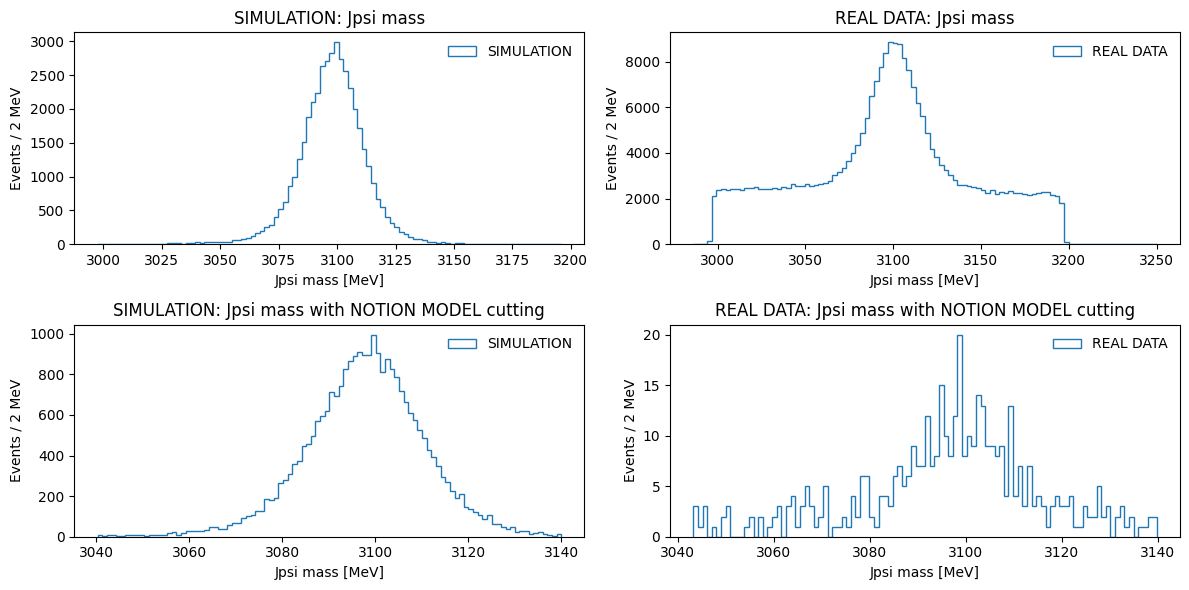

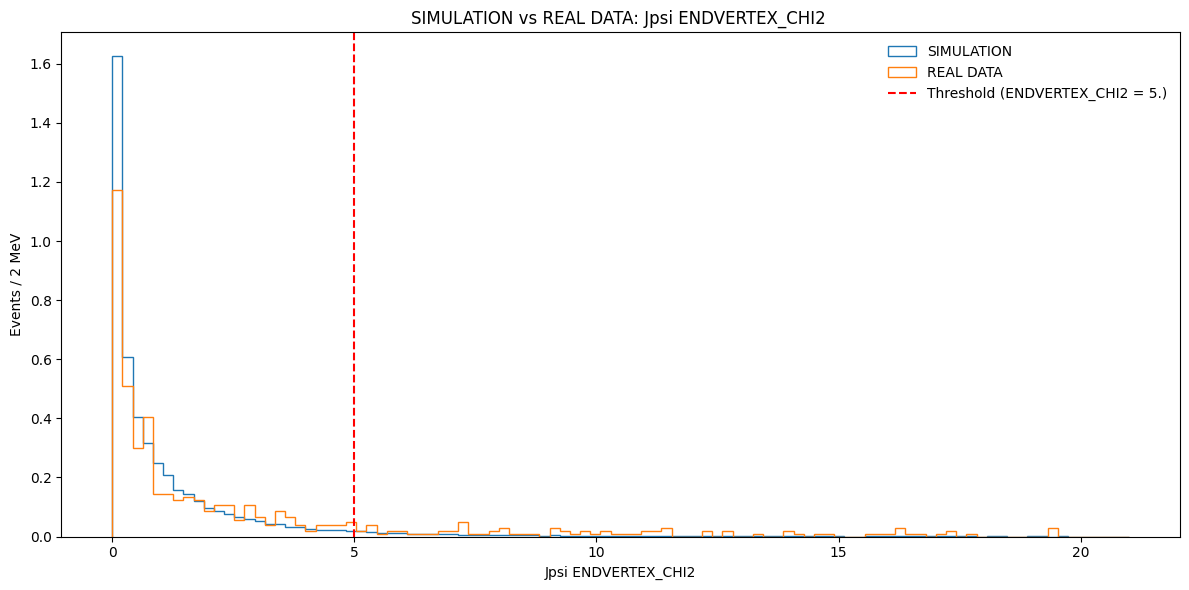

In [29]:
#ENDVERTEX_CHI2 checking (Jpsi_ENDVERTEX_CHI2<5.)


simu_data_true = simu_data['Jpsi_M']
real_data_true = real_data['Jpsi_M']
simu_data_cut = simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M']
real_data_cut = real_data.query(Notion_model_selection_Jpsi)['Jpsi_M']

mean_simu_true = np.mean(simu_data_true)
mean_real_true = np.mean(real_data_true)
mean_simu_data = np.mean(simu_data_cut)
mean_real_data = np.mean(real_data_cut)

print(f'Mean of SIMULATION: {mean_simu_true:.2f} MeV')
print(f'Mean of REAL DATA: {mean_real_true:.2f} MeV')
print(f'Mean of SIMULATION with NOTION MODEL cutting: {mean_simu_data:.2f} MeV')
print(f'Mean of REAL DATA with NOTION MODEL cutting: {mean_real_data:.2f} MeV')

fig, ax = plt.subplots(2, 2, figsize=(12, 6))

ax[0,0].hist(simu_data['Jpsi_M'], bins=100, histtype='step', label='SIMULATION')
ax[0,0].set_xlabel('Jpsi mass [MeV]')
ax[0,0].set_ylabel('Events / 2 MeV')
ax[0,0].set_title('SIMULATION: Jpsi mass')
ax[0,0].legend(frameon=False)

ax[0,1].hist(real_data['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax[0,1].set_xlabel('Jpsi mass [MeV]')
ax[0,1].set_ylabel('Events / 2 MeV')
ax[0,1].set_title('REAL DATA: Jpsi mass')
ax[0,1].legend(frameon=False)

ax[1,0].hist(simu_data.query(Notion_model_selection_Jpsi)['Jpsi_M'], bins=100, histtype='step', label='SIMULATION')
ax[1,0].set_xlabel('Jpsi mass [MeV]')
ax[1,0].set_ylabel('Events / 2 MeV')
ax[1,0].set_title('SIMULATION: Jpsi mass with NOTION MODEL cutting')
ax[1,0].legend(frameon=False)

ax[1,1].hist(real_data.query(Notion_model_selection_Jpsi)['Jpsi_M'], bins=100, histtype='step', label='REAL DATA')
ax[1,1].set_xlabel('Jpsi mass [MeV]')
ax[1,1].set_ylabel('Events / 2 MeV')
ax[1,1].set_title('REAL DATA: Jpsi mass with NOTION MODEL cutting')
ax[1,1].legend(frameon=False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize=(12, 6))
axes.hist(simu_data.query(Notion_model_selection_Jpsi_without_ENDVERTEX_CHI2)['Jpsi_ENDVERTEX_CHI2'],density = True, bins=100, histtype='step', range=(0,21), label='SIMULATION')
axes.hist(real_data.query(Notion_model_selection_Jpsi_without_ENDVERTEX_CHI2)['Jpsi_ENDVERTEX_CHI2'],density = True, bins=100, histtype='step', range=(0,21), label='REAL DATA')
axes.axvline(x=5., color='red', linestyle='--', label='Threshold (ENDVERTEX_CHI2 = 5.)')
axes.set_xlabel('Jpsi ENDVERTEX_CHI2')
axes.set_ylabel('Events / 2 MeV')
axes.set_title('SIMULATION vs REAL DATA: Jpsi ENDVERTEX_CHI2 ')
axes.legend(frameon=False)

plt.tight_layout()
plt.show()